In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In the next cell, we are going to initialize a dataframe with general information from all players. We selected the key_stats.csv because it contains the information of all players, no matter the position.

In [2]:
files_base_dir = '/kaggle/input/ucl-202122-uefa-champions-league'
all_players_file = 'key_stats'

players_df = pd.read_csv(f"{files_base_dir}/{all_players_file}.csv").set_index(['player_name', 'club', 'position']).stack().unstack()

In [3]:
players_df.head()

,,,minutes_played,match_played,goals,assists,distance_covered
player_name,club,position,,,,,
Aaronson,Salzburg,Midfielder,715,8,0,2,103.5
Abubakari,Malmö,Forward,116,4,0,0,15.3
Acuña,Sevilla,Defender,379,5,0,0,43.2
Adams,Leipzig,Midfielder,292,5,0,0,38.9
Adamu,Salzburg,Forward,231,8,1,0,32.6


In [4]:
players_df.columns

Index(['minutes_played', 'match_played', 'goals', 'assists',
       'distance_covered'],
      dtype='object')

Now, we are going to unite all of the information in the csv files into one single dataframe. For that, we are going to concatenate each of the csvs based on a ['player_name', 'club', 'position'] index.

In [5]:
files = ['attacking', 'defending', 'goalkeeping', 'attempts', 'disciplinary', 'distributon', 'goals']

for file in files:
    players_extracted = pd.read_csv(f"{files_base_dir}/{file}.csv")
    players_extracted = players_extracted.set_index(['player_name', 'club', 'position']).stack().unstack()
    
    players_extracted.drop('serial', axis=1, inplace=True, errors='ignore')
    for col in list(players_df.columns):
        players_extracted.drop(col, axis=1, inplace=True, errors='ignore')
    
    players_df = pd.concat([
        players_df,
        players_extracted
    ], axis=1)
    
players_df.reset_index(inplace=True)
players_df.fillna(0.0, inplace=True)

In [6]:
players_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,corner_taken,offsides,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
0,Aaronson,Salzburg,Midfielder,715.0,8.0,0.0,2.0,103.5,4.0,5.0,...,18.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abubakari,Malmö,Forward,116.0,4.0,0.0,0.0,15.3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acuña,Sevilla,Defender,379.0,5.0,0.0,0.0,43.2,0.0,0.0,...,30.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Adams,Leipzig,Midfielder,292.0,5.0,0.0,0.0,38.9,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adamu,Salzburg,Forward,231.0,8.0,1.0,0.0,32.6,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
players_df.columns

Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered', 'corner_taken', 'offsides',
       'dribbles', 'balls_recoverd', 'tackles', 't_won', 't_lost',
       'clearance_attempted', 'saved', 'conceded', 'saved_penalties',
       'cleansheets', 'punches made', 'total_attempts', 'on_target',
       'off_target', 'blocked', 'fouls_committed', 'fouls_suffered', 'red',
       'yellow', 'pass_accuracy', 'pass_attempted', 'pass_completed',
       'cross_accuracy', 'cross_attempted', 'cross_complted',
       'freekicks_taken', 'right_foot', 'left_foot', 'headers', 'others',
       'inside_area', 'outside_areas', 'penalties'],
      dtype='object')

In [8]:
players_df.describe()

,minutes_played,match_played,goals,assists,corner_taken,offsides,dribbles,balls_recoverd,tackles,t_won,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,329.845539,5.062583,0.490013,0.374168,0.782956,0.332889,2.105193,13.697736,3.950732,1.727031,...,5.145140,1.380826,4.430093,0.237017,0.169108,0.079893,0.005326,0.442077,0.050599,0.047936
std,248.883454,2.739357,1.310305,0.843689,3.341780,1.240848,6.611776,14.799026,4.905667,2.503076,...,8.819159,2.844664,6.567808,0.806483,0.636159,0.333079,0.072835,1.227045,0.268520,0.283489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,490.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.500000,6.000000,2.000000,...,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1230.000000,13.000000,15.000000,7.000000,36.000000,10.000000,83.000000,76.000000,35.000000,18.000000,...,81.000000,24.000000,53.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000


Now, we are going to scatterplot the goals/shots by position

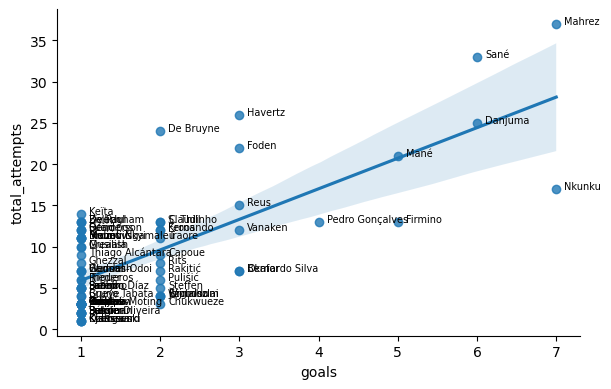

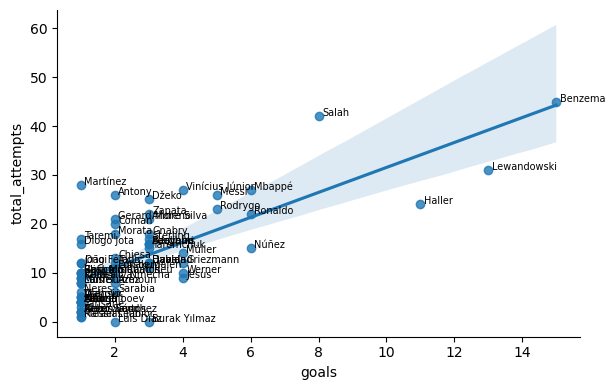

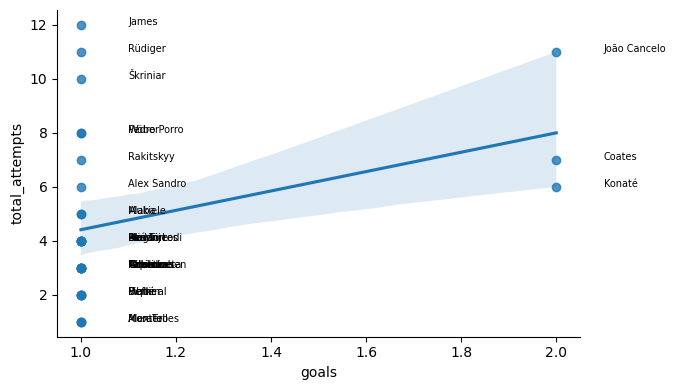

In [9]:
def plot_goals_shots_chart(data, hue=None, height=4):
    fgrid = sns.lmplot(data=data, x='goals', y='total_attempts', hue=hue, height=height, aspect=1.5)
    ax = fgrid.axes[0,0]

    plt.title = 'Goals/Shots Scatterplot'

    for i, row in goals_shots_data.iterrows():
        ax.text(row['goals'] + 0.1, row['total_attempts'], row['player_name'], fontsize=7)

    plt.xlabel = 'Goals'
    plt.ylabel = 'Total Shots'
    

positions = players_df['position'].unique()
for position in positions:
    goals_shots_data = players_df[(players_df['position'] == position) & (players_df['goals'] > 0)]
    if not len(goals_shots_data): continue
    plot_goals_shots_chart(goals_shots_data)


Or we can just plot all of it in a sigle chart

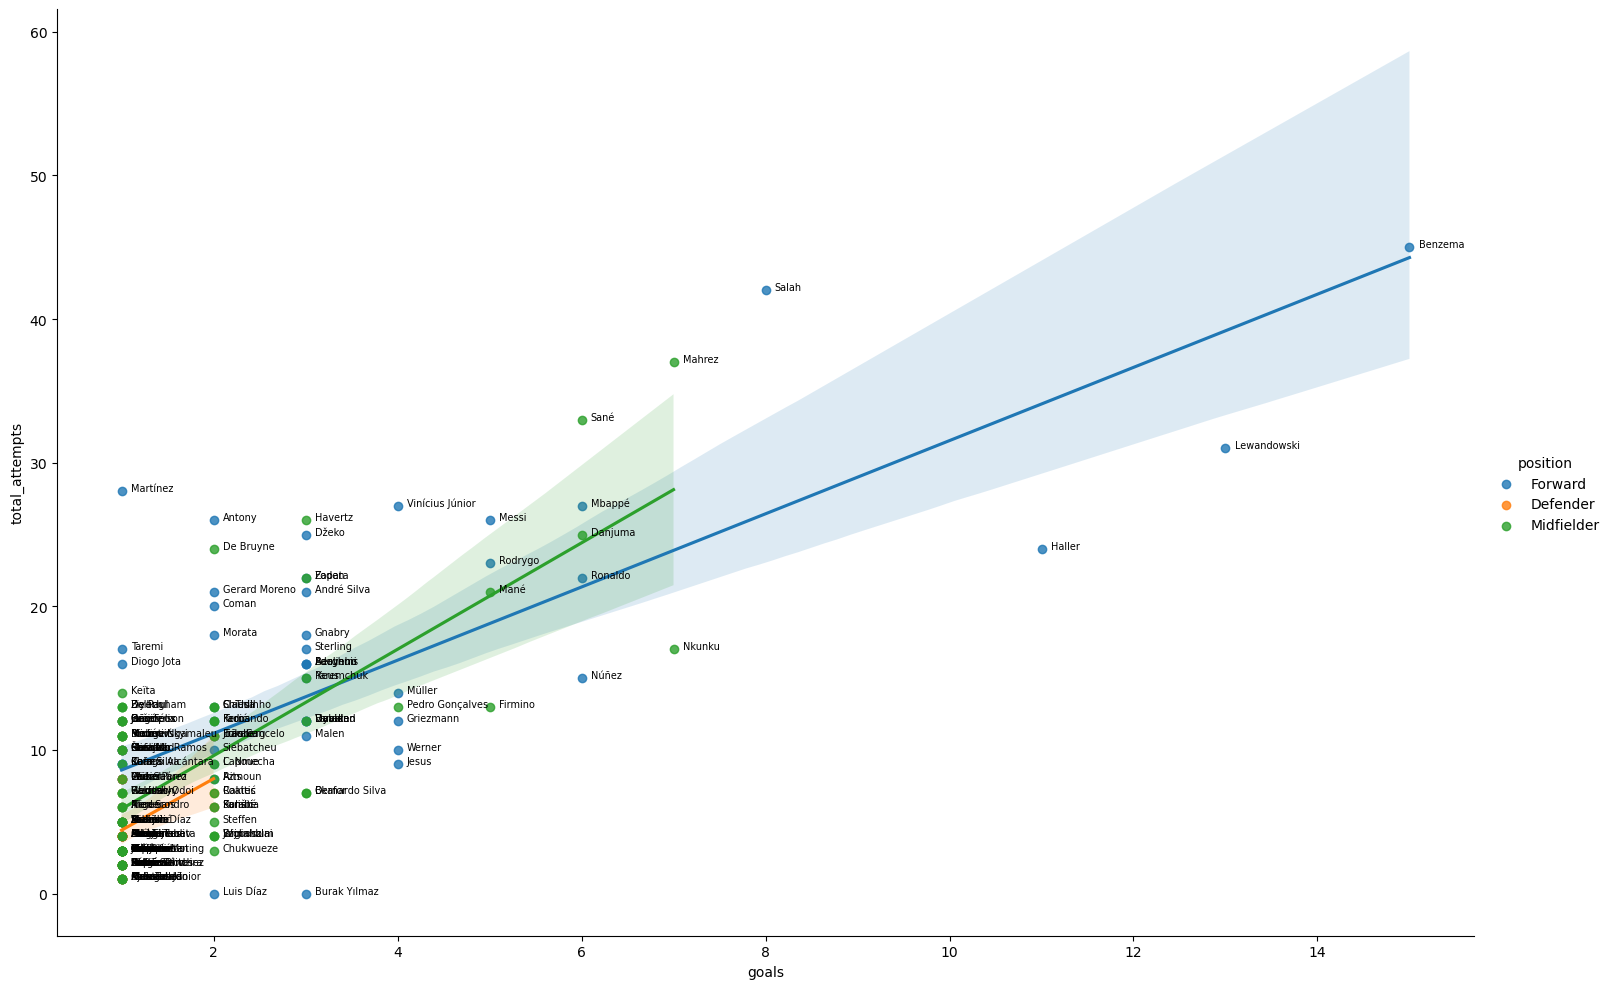

In [10]:
goals_shots_data = players_df[players_df['goals'] > 0]
plot_goals_shots_chart(goals_shots_data, hue='position', height=10)